<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


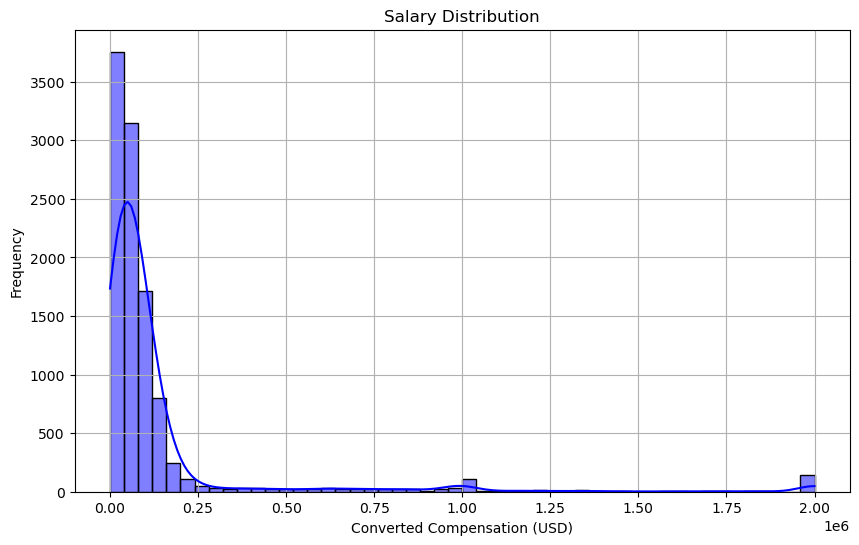

In [10]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution curve for the "ConvertedComp" column
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], bins=50, kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


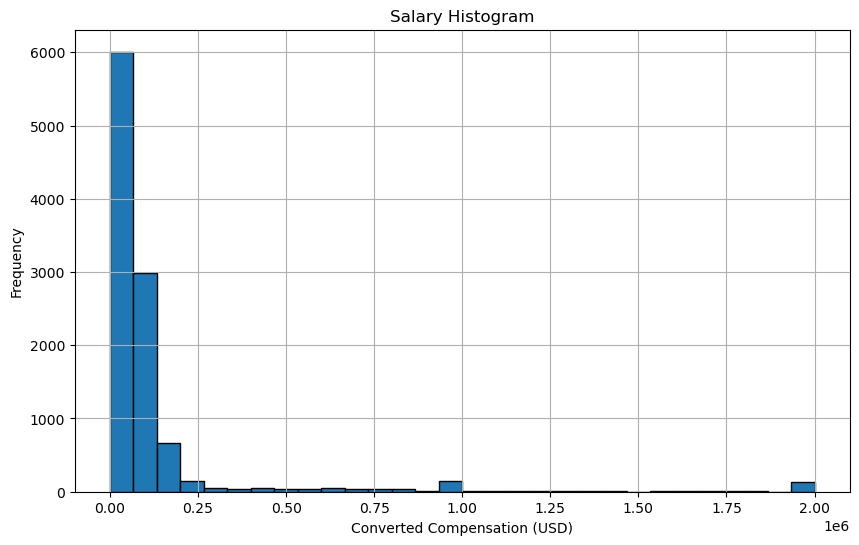

In [12]:
converted_comp = df['ConvertedComp']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(converted_comp, bins=30, edgecolor='k')
plt.title('Salary Histogram')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


















What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
median_salary = df['ConvertedComp'].median()

print(f"The median of the ConvertedComp column is: ${median_salary:.2f}")

The median of the ConvertedComp column is: $57745.00


How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
man_responders = df[df['Gender'] == 'Man']

# Count the number of rows (responders) in the filtered DataFrame
count_man_responders = len(man_responders)

print(f"The number of responders who identified as 'Man' only is: {count_man_responders}")

The number of responders who identified as 'Man' only is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for these responders
median_woman_salary = woman_responders['ConvertedComp'].median()

print(f"The median ConvertedComp for responders who identified as 'Woman' only is: ${median_woman_salary:.2f}")

The median ConvertedComp for responders who identified as 'Woman' only is: $57708.00


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])
min_age = age_summary['min']
q1 = age_summary['25%']
median_age = age_summary['50%']
q3 = age_summary['75%']
max_age = age_summary['max']

print("Five-Number Summary for Age:")
print(f"Minimum (Min): {min_age}")
print(f"First Quartile (Q1): {q1}")
print(f"Median (Q2): {median_age}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum (Max): {max_age}")





Five-Number Summary for Age:
Minimum (Min): 16.0
First Quartile (Q1): 25.0
Median (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum (Max): 99.0


Plot a histogram of the column `Age`.


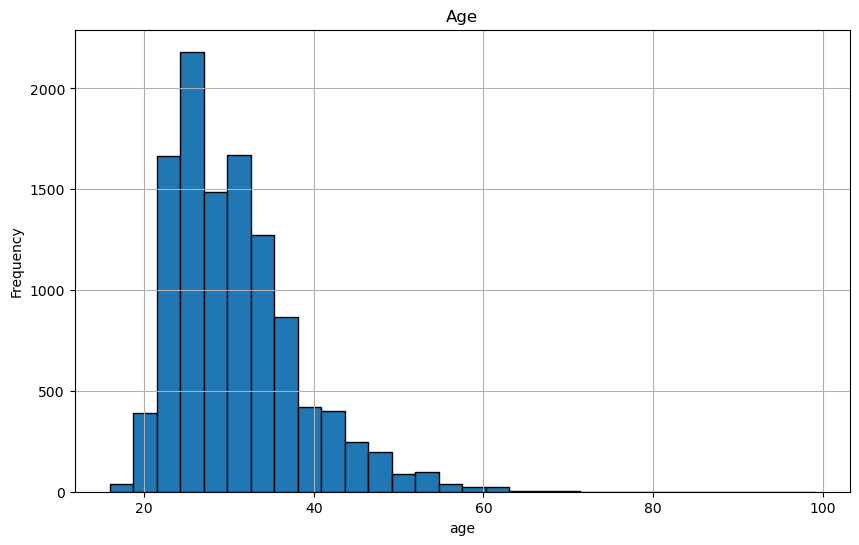

In [21]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='k')
plt.title('Age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.grid(True)
plt.show()




## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


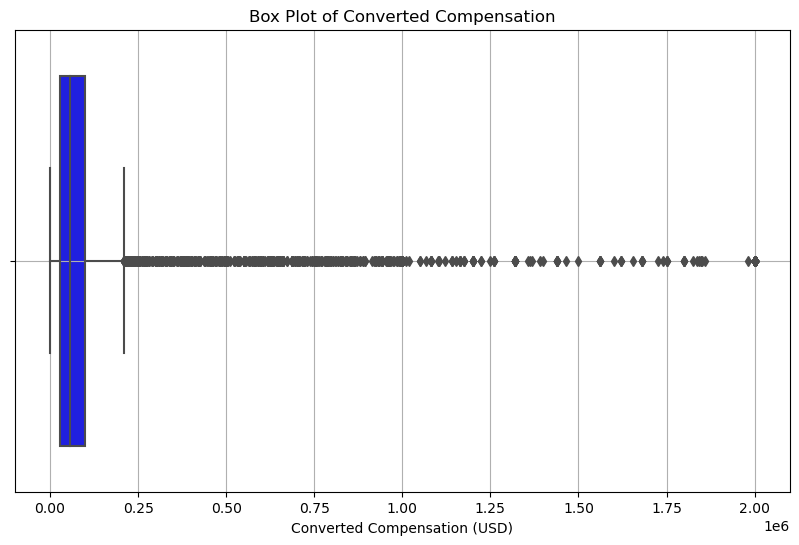

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='blue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [24]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR:.2f}")

The Interquartile Range (IQR) for ConvertedComp is: 73132.00


Find out the upper and lower bounds.


In [25]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print(f"Lower Bound (LB): {LB:.2f}")
print(f"Upper Bound (UB): {UB:.2f}")

Lower Bound (LB): -82830.00
Upper Bound (UB): 209698.00


Identify how many outliers are there in the `ConvertedComp` column.


In [31]:
# your code goes here
outliers = (df['ConvertedComp'] < LB) | (df['ConvertedComp'] > UB)

# Count the number of outliers
num_outliers = sum(outliers)

print(f"The number of outliers in the ConvertedComp column is: {num_outliers}")
median_before_outliers = df['ConvertedComp'].median()

print(f"The median ConvertedComp before removing outliers is: ${median_before_outliers:.2f}")

The number of outliers in the ConvertedComp column is: 879
The median ConvertedComp before removing outliers is: $57745.00


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [34]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= LB) & (df['ConvertedComp'] <= UB)]
median_after_outliers = df_no_outliers['ConvertedComp'].median()

print(f"The median ConvertedComp after removing outliers is: ${median_after_outliers:.2f}")

The median ConvertedComp after removing outliers is: $52704.00


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [28]:
# your code goes here
correlation_matrix = df.corr(method='pearson')  

# Get the correlation of "Age" with all other numerical columns
age_correlation = correlation_matrix['Age']

# Display the correlation values
print("Correlation between Age and other numerical columns:")
print(age_correlation)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
